# **1. Perkenalan Dataset**


Dataset yang digunakan adalah Pima Indians Diabetes Database yang diperoleh dari kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
Dataset ini merupakan kumpulan data medis yang digunakan untuk memprediksi apakah seorang pasien memiliki diabetes. Dataset ini berisi 768 sampel dengan 8 fitur kesehatan seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, insulin, BMI, riwayat keluarga terkait diabetes, dan usia. Targetnya adalah kolom Outcome, di mana nilai 1 berarti pasien terdiagnosis diabetes, dan 0 berarti tidak.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("/content/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

Shape: (768, 9)

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
cols_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_zero_invalid:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: jumlah nilai 0 = {zero_count}")

Glucose: jumlah nilai 0 = 5
BloodPressure: jumlah nilai 0 = 35
SkinThickness: jumlah nilai 0 = 227
Insulin: jumlah nilai 0 = 374
BMI: jumlah nilai 0 = 11


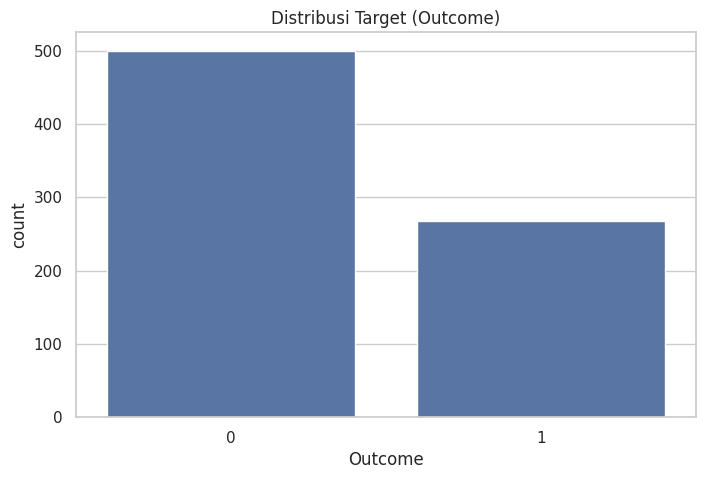

,count
Outcome,
0,500
1,268


In [8]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribusi Target (Outcome)")
plt.show()

df['Outcome'].value_counts()

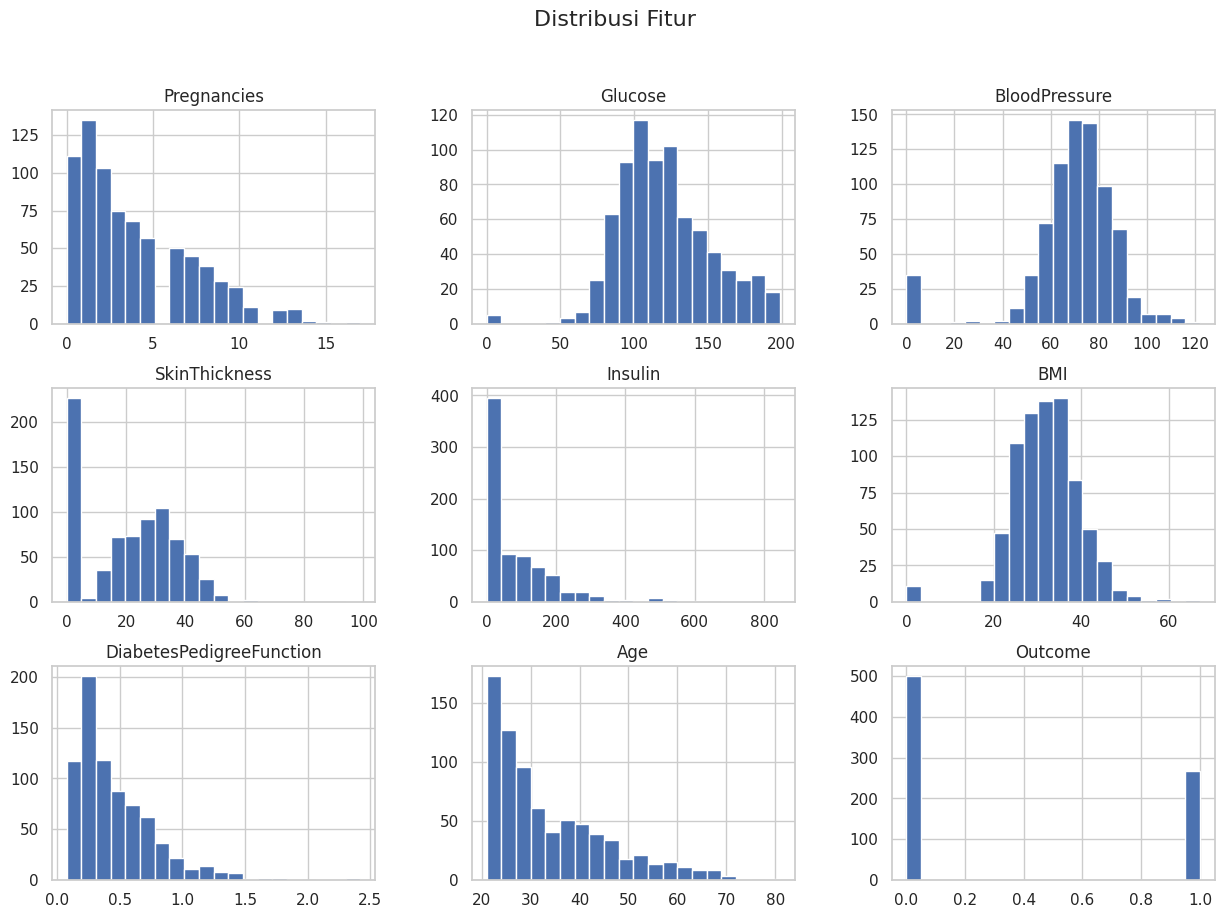

In [9]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi Fitur", fontsize=16)
plt.show()

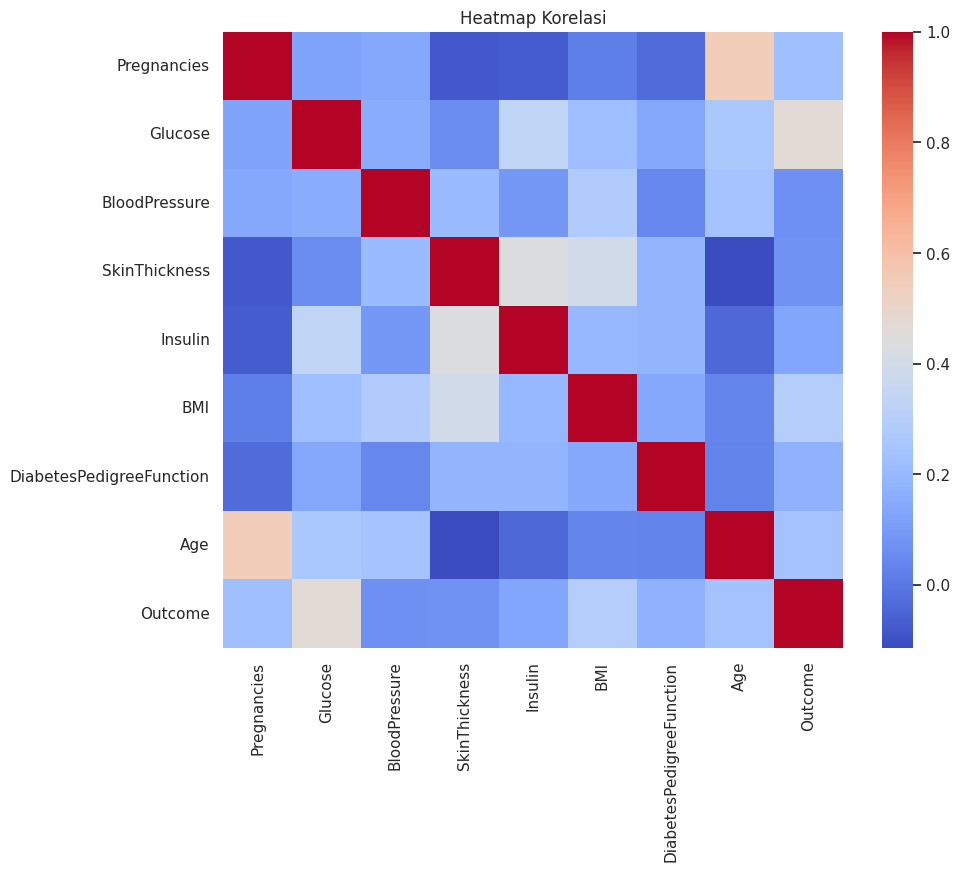

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

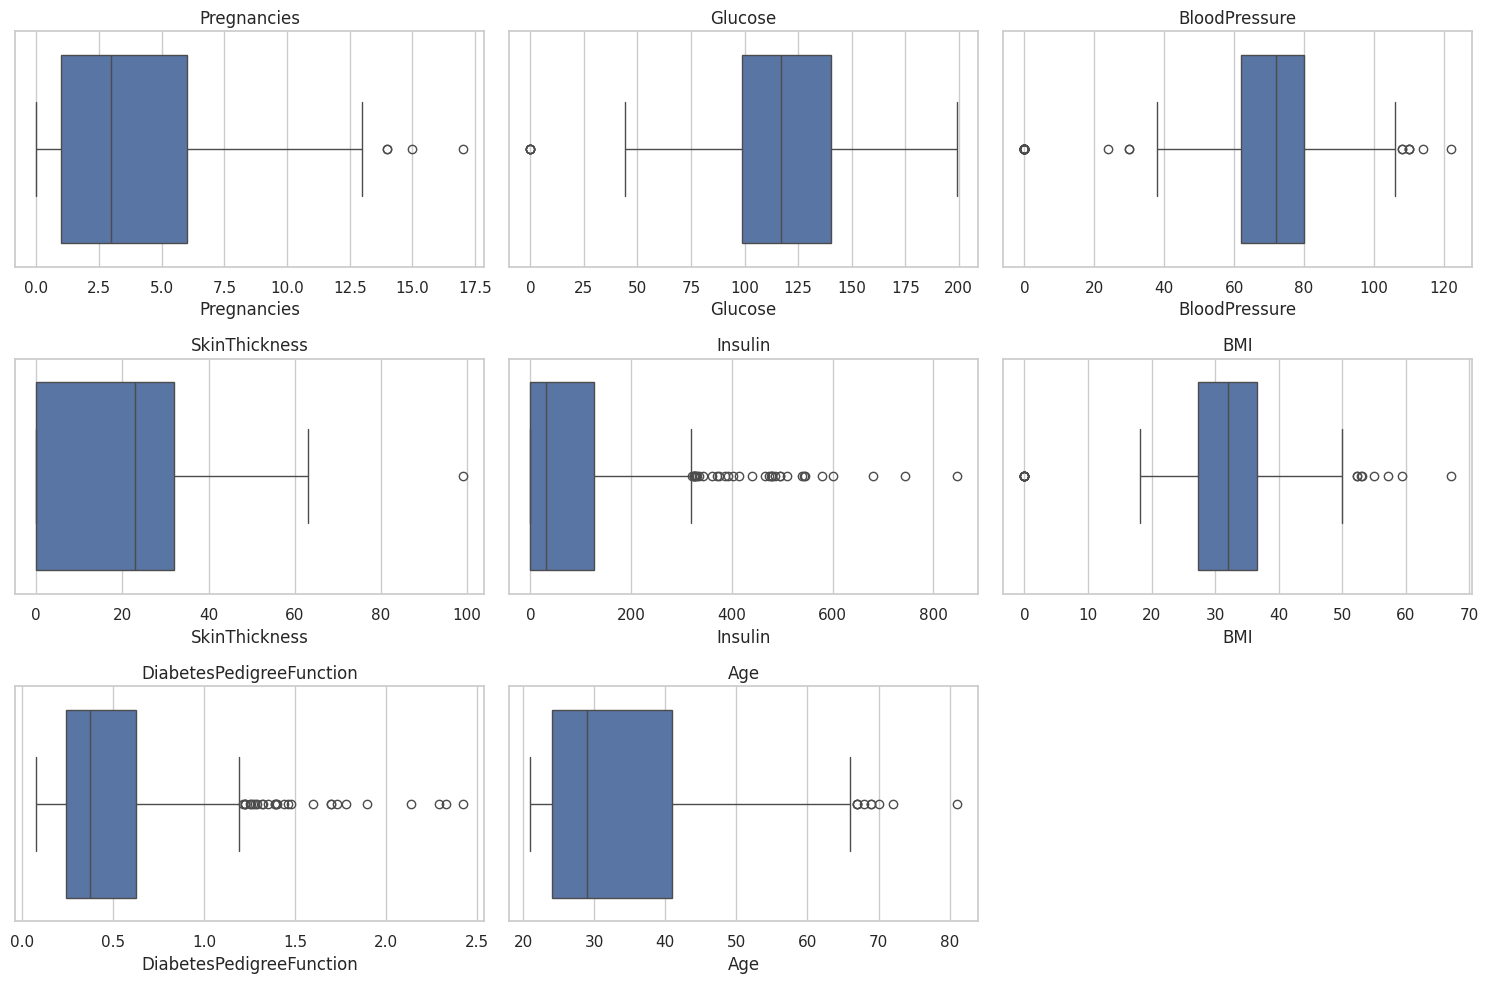

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
cols_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

cols_zero_invalid

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [13]:
df_clean = df.copy()

for col in cols_zero_invalid:
    df_clean[col] = df_clean[col].replace(0, np.nan)

df_clean.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


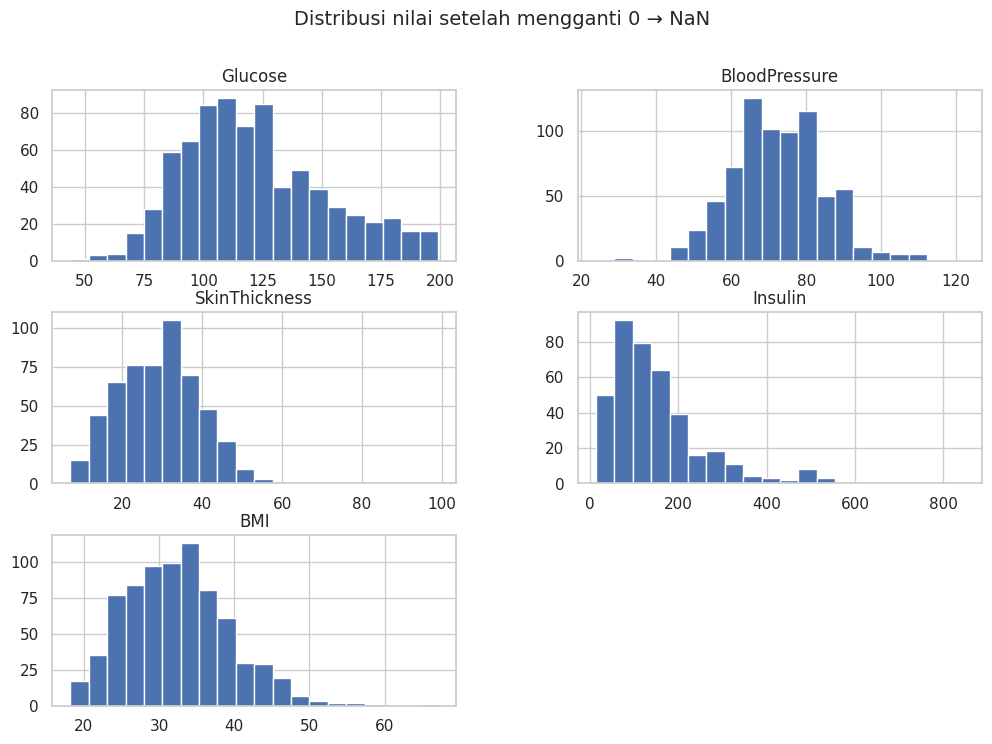

In [14]:
df_clean[cols_zero_invalid].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribusi nilai setelah mengganti 0 → NaN", fontsize=14)
plt.show()

In [15]:
X = df_clean.drop(columns=["Outcome"])
y = df_clean["Outcome"]

X.head(), y.head()

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6    148.0           72.0           35.0      NaN  33.6   
 1            1     85.0           66.0           29.0      NaN  26.6   
 2            8    183.0           64.0            NaN      NaN  23.3   
 3            1     89.0           66.0           23.0     94.0  28.1   
 4            0    137.0           40.0           35.0    168.0  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [16]:
numeric_cols = X.select_dtypes(include='number').columns.tolist()
numeric_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Eksperimen 1

In [17]:
pipeline_1 = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_cols)
], remainder='passthrough')

In [18]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
model_1 = Pipeline([
    ('preproc', pipeline_1),
    ('model', LogisticRegression(max_iter=1000))
])

model_1.fit(X_train_1, y_train_1)

preds_1 = model_1.predict(X_test_1)
probs_1 = model_1.predict_proba(X_test_1)[:, 1]

In [20]:
acc_1 = accuracy_score(y_test_1, preds_1)
f1_1 = f1_score(y_test_1, preds_1)
auc_1 = roc_auc_score(y_test_1, probs_1)

print("Pipeline 1 (Mean + StandardScaler):")
print("Accuracy :", acc_1)
print("F1-score :", f1_1)
print("ROC-AUC  :", auc_1)

Pipeline 1 (Mean + StandardScaler):
Accuracy : 0.6948051948051948
F1-score : 0.5252525252525253
ROC-AUC  : 0.8122222222222223


Eksperimen 2

In [21]:
pipeline_2 = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),   # median fill
        ('scaler', RobustScaler())                       # robust scaler untuk outlier
    ]), numeric_cols)
], remainder='passthrough')

In [22]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_2 = Pipeline([
    ('preproc', pipeline_2),
    ('clf', LogisticRegression(max_iter=1000))
])

In [23]:
model_2.fit(X_train_2, y_train_2)
preds_2 = model_2.predict(X_test_2)
probs_2 = model_2.predict_proba(X_test_2)[:,1]

In [25]:
acc_2 = accuracy_score(y_test_2, preds_2)
f1_2 = f1_score(y_test_2, preds_2)
auc_2 = roc_auc_score(y_test_2, probs_2)

print("Pipeline 2 (Median + Robust):")
print("Accuracy :", acc_2)
print("F1-score :", f1_2)
print("ROC-AUC  :", auc_2)

Pipeline 2 (Median + Robust):
Accuracy : 0.7012987012987013
F1-score : 0.54
ROC-AUC  : 0.8122222222222223


Eksperimen 3

In [26]:
pipeline_3 = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),   # KNN imputasi
        ('scaler', MinMaxScaler())                 # scaling ke [0,1]
    ]), numeric_cols)
], remainder='passthrough')

In [28]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_3 = Pipeline([('preproc', pipeline_3), ('clf', LogisticRegression(max_iter=1000))])

In [29]:
model_3.fit(X_train_3, y_train_3)

preds_3 = model_3.predict(X_test_3)
probs_3 = model_3.predict_proba(X_test_3)[:,1]

In [30]:
acc_3 = accuracy_score(y_test_3, preds_3)
f1_3 = f1_score(y_test_3, preds_3)
auc_3 = roc_auc_score(y_test_3, probs_3)

print("Pipeline 3 (KNNImputer + MinMaxScaler):")
print("Accuracy :", acc_3)
print("F1-score :", f1_3)
print("ROC-AUC  :", auc_3)

Pipeline 3 (KNNImputer + MinMaxScaler):
Accuracy : 0.7012987012987013
F1-score : 0.54
ROC-AUC  : 0.8112962962962962


In [32]:
from sklearn.model_selection import cross_val_score

pipelines = {
    "A_mean_standard": pipeline_1,
    "B_median_robust": pipeline_2,
    "C_knn_minmax": pipeline_3
}

results = []
from sklearn.pipeline import Pipeline
for name, preproc in pipelines.items():
    model = Pipeline([('pre', preproc), ('clf', LogisticRegression(max_iter=1000))])
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
    results.append({
        'pipeline': name,
        'mean_roc_auc': scores.mean(),
        'std_roc_auc': scores.std()
    })

res_df = pd.DataFrame(results).sort_values('mean_roc_auc', ascending=False).reset_index(drop=True)
res_df['mean_roc_auc'] = res_df['mean_roc_auc'].round(4)
res_df['std_roc_auc'] = res_df['std_roc_auc'].round(4)
display(res_df)

,pipeline,mean_roc_auc,std_roc_auc
0,A_mean_standard,0.8386,0.0299
1,B_median_robust,0.8385,0.0297
2,C_knn_minmax,0.8377,0.0268


In [38]:
best = res_df.iloc[0]
second = res_df.iloc[1]

chosen_pipeline = best['pipeline']
if (best['mean_roc_auc'] - second['mean_roc_auc']) < 0.01:
    chosen = res_df.sort_values('std_roc_auc').iloc[0]
    chosen_pipeline = chosen['pipeline']

print("Pipeline terpilih:", chosen_pipeline)

Pipeline terpilih: C_knn_minmax
